# Model Selection - Principal Components Regression

We will examine subset selection by trying to predict the Salary of baseball plaers using a number of statistics associated with performance from the previous year.

## Principal Component Regression

In [29]:
library(ISLR)
library(pls)

Hitters=na.omit(Hitters)

set.seed(2)


pcr.fit=pcr(Salary~.,data=Hitters,scale=TRUE,validation="CV") 
#scale=TRUE standardizes each predictor
#validation="CV" performs 10-fold cross validation for each M (the number of principla components used)
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

The CrossValidation Score is provided for each $m$. The function pcr() outputs the Root Mean Squared Error, so to obtain MSE we just square it.

E.g. if $RMSE = 349.1$, then $MSE=(349.1)^2 = 121570.81$ 

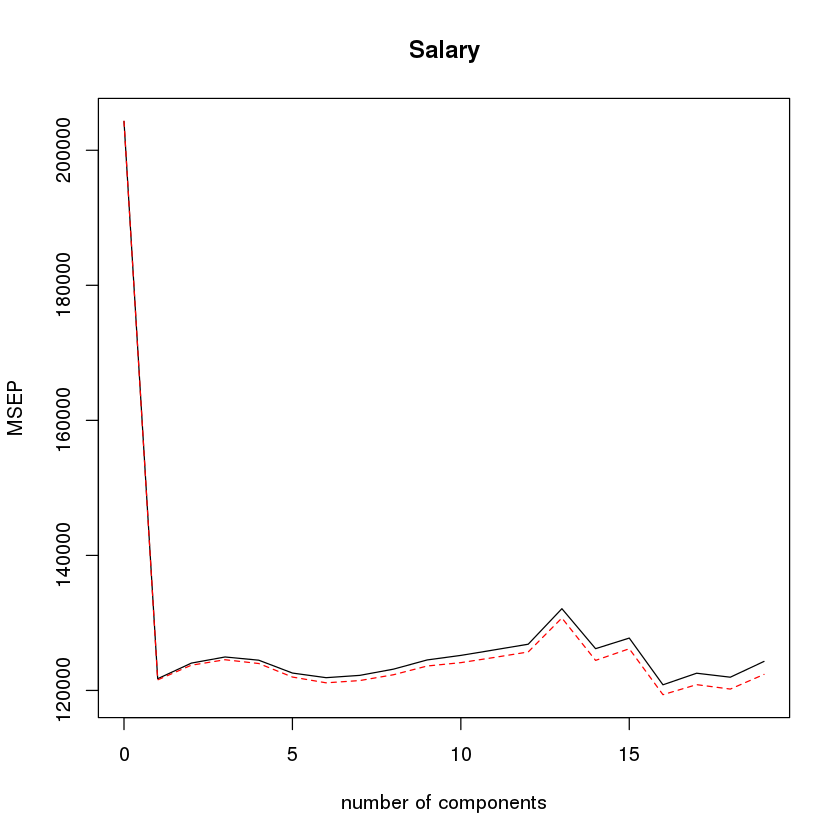

In [30]:
validationplot(pcr.fit, val.type="MSEP")

So the smallest MSE is at 16 components (which is not that different from the full model of 19). But we can also see that 1 princial component performs well...

The summary() function also reports the *percentage of varaince explained* in the predictors and in the response. We can think of this as the amount of information about the predictors captured using $M$ components.

So when $M=1$, we capture $38.31 \%$ of the variance in the predictors.

When $M=6$, we capture $88.63 \%$ of the variance in the predictors.

## Assesing PCR on Test Data
We want to break the data into a test and training set, use CV on the training data to select the  number of components, and the assess it on the test data.

### Select components on training data

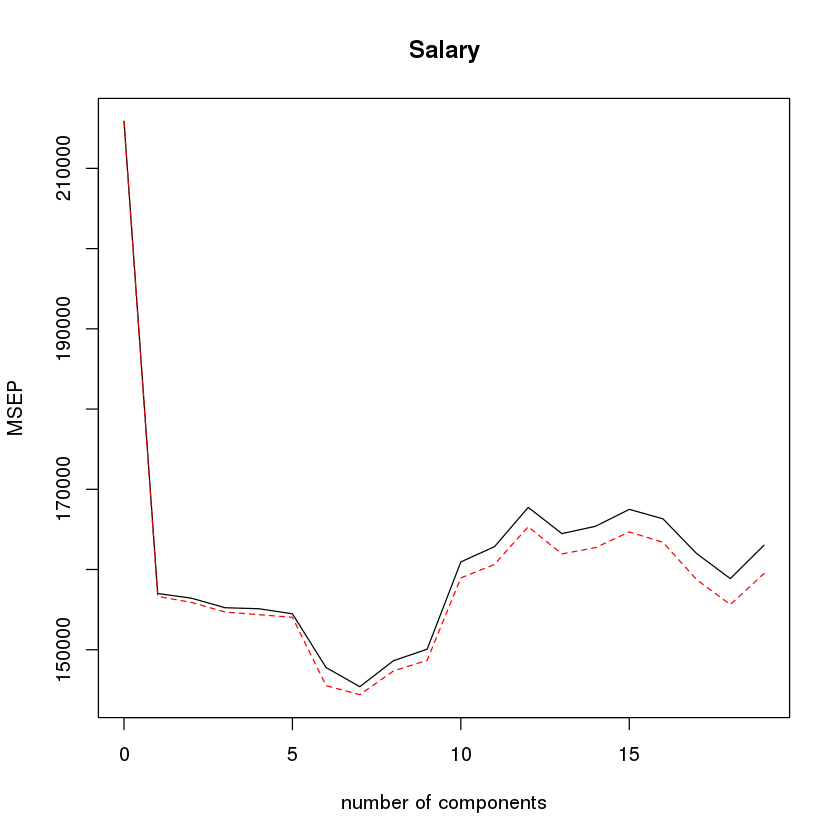

In [31]:
set.seed(1)
train=sample(1:nrow(x),nrow(x)/2)
test=(-train)

pcr.fit=pcr(Salary~.,data=Hitters,subset=train,scale=TRUE,validation="CV") 
validationplot(pcr.fit,val.type="MSEP")

Cross validation identifies $M=7$ as the numberof principal compments to use. 

### Assess on Test

In [32]:

x=model.matrix(Salary~.,Hitters)[,-1]
y=Hitters$Salary
y.test=y[test]

pcr.pred=predict(pcr.fit,x[test,],ncomp=7)
mean((pcr.pred-y.test)^2)

[1] 96556.22

This is similar to the MSE test from ridge regression and LASSO.

However, because PCR does not perform varaible selection, its results are more difficult to interpret.

### Report on Full Data

Finally, we fit PCR on the full data using $M=7$

In [36]:
pcr.fit=pcr(Salary~.,data=Hitters,scale=TRUE,ncomp=7) 
summary(pcr.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26
Salary    40.63    41.58    42.17    43.22    44.90    46.48    46.69


## Partial Least Squares

The pls() package can also perform partial least squares.

### Select partial least squares on training data with Cross-Validation

In [37]:
set.seed(1)
pls.fit=plsr(Salary~.,data=Hitters,subset=train,scale=TRUE,validation="CV") 
summary(pls.fit)

Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

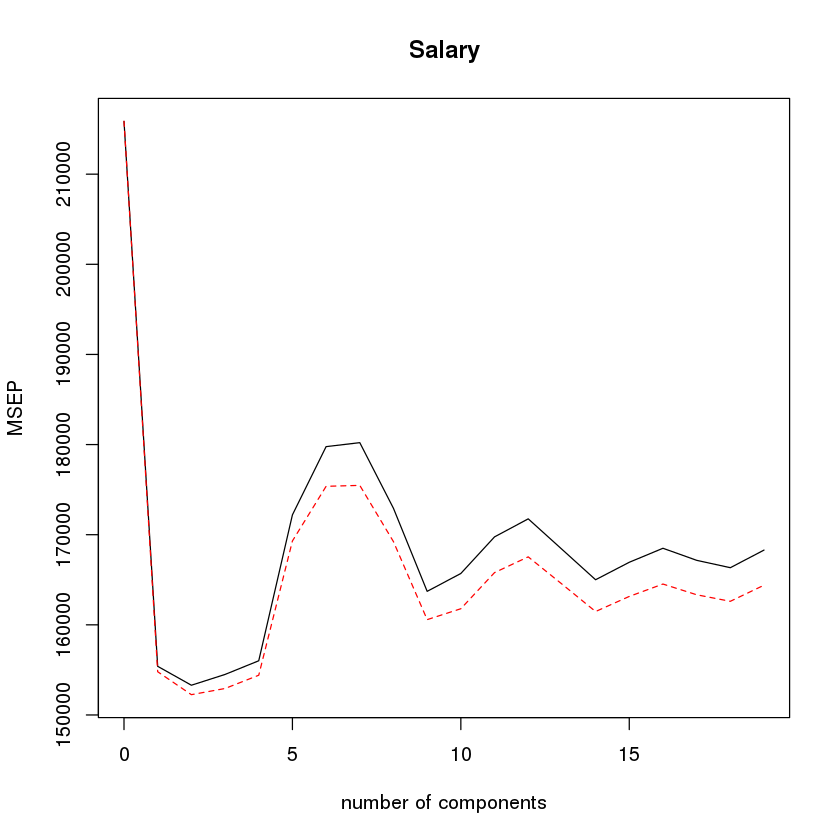

In [38]:
validationplot(pls.fit,val.type="MSEP")

Cross-validation identifies $M=2$ partial least squares

### Assess on Test Data

In [39]:
pls.pred=predict(pls.fit,x[test,],ncomp=2)
mean((pls.pred-y.test)^2)

[1] 101417.5

This is a bit higher than ridge, LASSO, and PCR.

### Report on Full Data

Using $M=2$

In [41]:
pls.fit=plsr(Salary~.,data=Hitters,scale=TRUE,ncomp=2) 
summary(pls.fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
        1 comps  2 comps
X         38.08    51.03
Salary    43.05    46.40
